# C9 Chua's circuit
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2022-04-13

Reference:
- https://ivanludvig.github.io/blog/2020/12/26/exploring-chuas-circuit.html
- https://github.com/IvanLudvig/chua

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

## Chua's

In [52]:
def Chua(M1, M2, alpha, beta, axis, path):
    # Define the ODE
    h = lambda x: M2*x + (M1-M2)*(abs(x+1)-abs(x-1))/2
    def derivative(t, v, d):
        dxdt = alpha * (v[1] - v[0] - h(v[0]))
        dydt = v[0] - v[1] + v[2]
        dzdt = - beta * v[1]
        return [dxdt, dydt, dzdt]
    # ODE solver
    v0 = [0.7, 0.0, 0.0]
    t0 = 0.0
    r = ode(derivative).set_integrator('dopri5')
    r.set_initial_value(v0, t0).set_f_params(1)
    # Time series
    tmax = 50
    dt = 0.02
    num_steps = int(tmax / dt) + 2
    # Generate the trace
    x = np.zeros(num_steps - 1)
    y = np.zeros(num_steps - 1)
    z = np.zeros(num_steps - 1)
    x[0], y[0], z[0] = v0
    idx = 1
    while r.successful() and r.t < tmax:
        r.integrate(r.t+dt)
        x[idx], y[idx], z[idx] = r.y[0:3]
        idx += 1
    
    # Plot
    plt.figure(figsize= (9, 6))

    if axis == "x-y":
        plt.plot(x, y, color='lightseagreen', 
                        label='M1 = {:.1f}, M2 = {:.1f}, alpha = {:.1f}, beta = {:.1f}'
                        .format(M1, M2, alpha, beta))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend(loc='center left', bbox_to_anchor=(0.2, -0.15))
        plt.savefig(path+"x-y.png", bbox_inches='tight', dpi=300)   
    elif axis == "x-z":
        plt.plot(x, z, color='lightseagreen', 
                        label='M1 = {:.1f}, M2 = {:.1f}, alpha = {:.1f}, beta = {:.1f}'
                        .format(M1, M2, alpha, beta))
        plt.xlabel('x')
        plt.ylabel('z')
        plt.grid()
        plt.legend(loc='center left', bbox_to_anchor=(0.2, -0.15))     
        plt.savefig(path+"x-z.png", bbox_inches='tight', dpi=300)   
    elif axis == "y-z":
        plt.plot(y, z, color='lightseagreen', 
                        label='M1 = {:.1f}, M2 = {:.1f}, alpha = {:.1f}, beta = {:.1f}'
                        .format(M1, M2, alpha, beta))
        plt.xlabel('y')
        plt.ylabel('z')
        plt.grid()  
        plt.legend(loc='center left', bbox_to_anchor=(0.2, -0.15)) 
        plt.savefig(path+"y-z.png", bbox_inches='tight', dpi=300)   
    elif axis == "3d":
        fig = plt.figure(figsize= (9, 6))
        ax = fig.add_subplot(projection='3d')
        plt.plot(x, y, z, color='lightseagreen', 
                            label='M1 = {:.1f}, M2 = {:.1f}, alpha = {:.1f}, beta = {:.1f}'
                            .format(M1, M2, alpha, beta))
        ax.set_xlabel('x')     
        ax.yaxis.set_label_text('y')
        ax.zaxis.set_label_text('z')
        plt.legend(loc='center left', bbox_to_anchor=(0.2, -0.15))  
        plt.grid()
        plt.savefig(path+"3d.png", bbox_inches='tight', dpi=300)   
    elif axis == "wave":
        fig, ax =  plt.subplots(3, 1, figsize=(9, 7))
        ax[0].plot(x, color='lightseagreen')
        ax[0].set_xlabel('Time t/s')
        ax[0].set_ylabel('x')
        ax[0].grid()

        ax[1].plot(y, color='lightseagreen')
        ax[1].set_xlabel('Time t/s')
        ax[1].set_ylabel('y')
        ax[1].grid()

        ax[2].plot(z, color='lightseagreen',
                        label='M1 = {:.1f}, M2 = {:.1f}, alpha = {:.1f}, beta = {:.1f}'
                        .format(M1, M2, alpha, beta))
        ax[2].set_xlabel('Time t/s')
        ax[2].set_ylabel('z')
        ax[2].grid()
        ax[2].legend(loc='center left', bbox_to_anchor=(0.2, 3.85))
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.35)
        plt.savefig(path+"wave.png", bbox_inches='tight', dpi=300)   
 

## Interactive
Ipywidgets
- `!pip install ipywidgets` 
- `!jupyter nbextension enable --py widgetsnbextension`
- More info: https://zhuanlan.zhihu.com/p/357811017

In [4]:
import ipywidgets as widgets
from ipywidgets import interact

In [20]:
@interact
def plot_Chua(axis = ['x-y', 'y-z', 'x-z', '3d', 'wave'], 
              M1 = (-2, 2, 0.1),
              M2 = (-2, 2, 0.1),
              alpha = (0, 50, 1),
              beta = (0, 200, 1)):
    return Chua(M1, M2, alpha, beta, axis)

interactive(children=(Dropdown(description='axis', options=('x-y', 'y-z', 'x-z', '3d', 'wave'), value='x-y'), …

## line

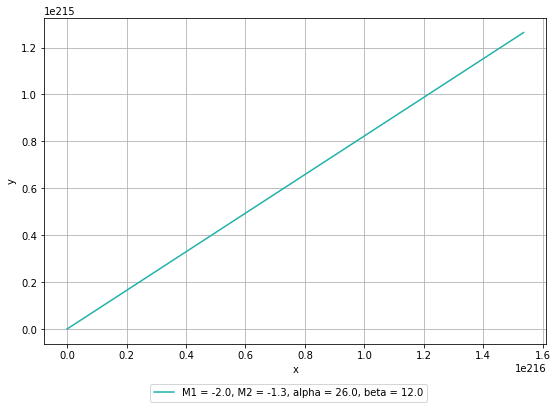

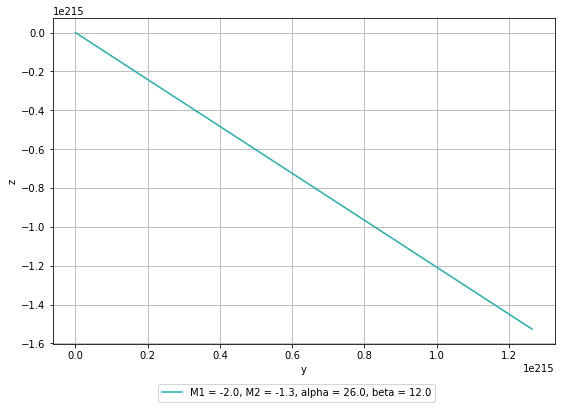

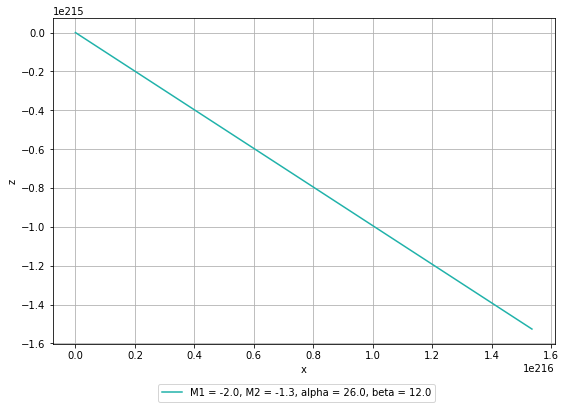

<Figure size 648x432 with 0 Axes>

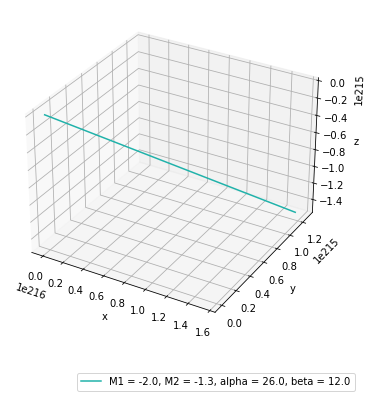

<Figure size 648x432 with 0 Axes>

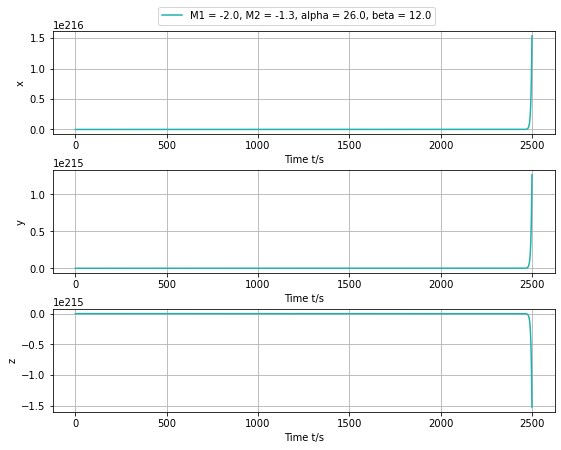

In [53]:
for axis in ['x-y', 'y-z', 'x-z', '3d', 'wave']:
    Chua(M1=-2.0, M2=-1.3, alpha=26, beta=12, axis=axis, path="Output/line/")

## limit ring

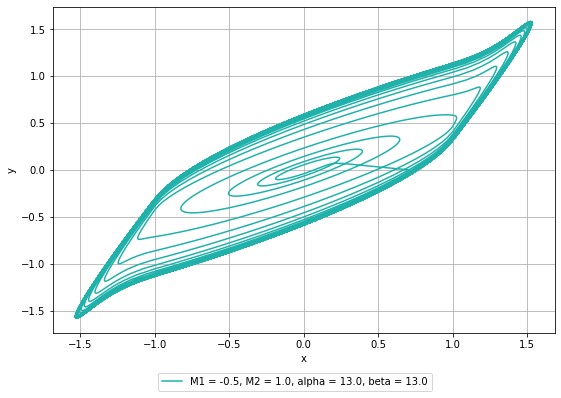

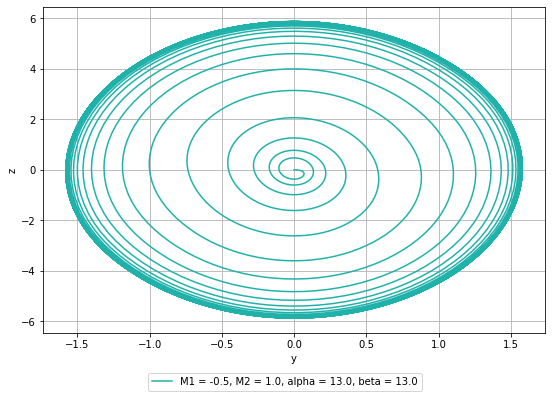

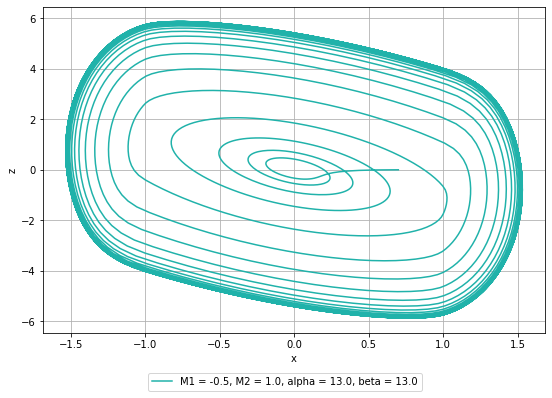

<Figure size 648x432 with 0 Axes>

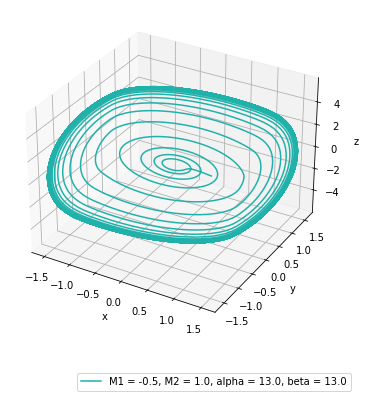

<Figure size 648x432 with 0 Axes>

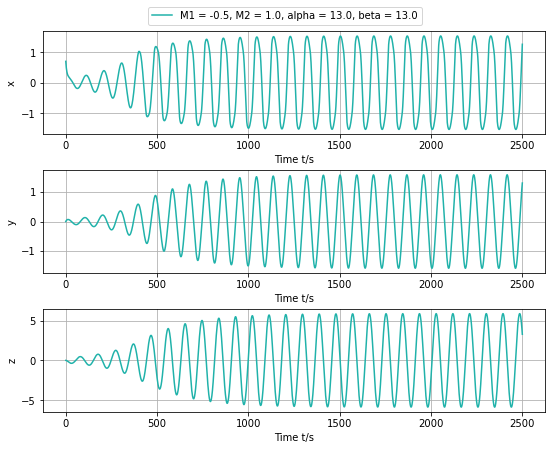

In [44]:
for axis in ['x-y', 'y-z', 'x-z', '3d', 'wave']:
    Chua(M1=-0.5, M2=1.0, alpha=13, beta=13, axis=axis, path="Output/limit ring/")

## Double attractors

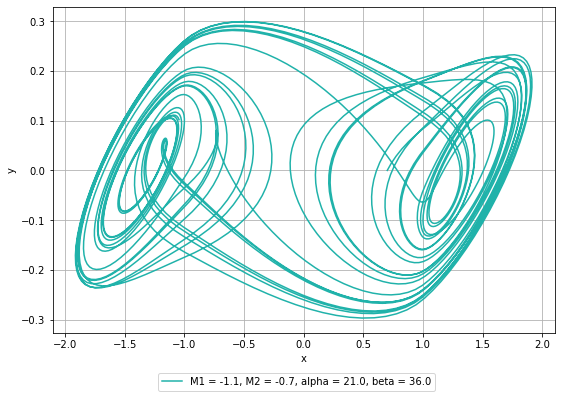

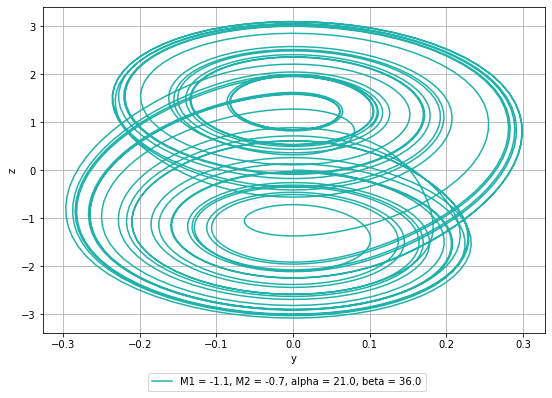

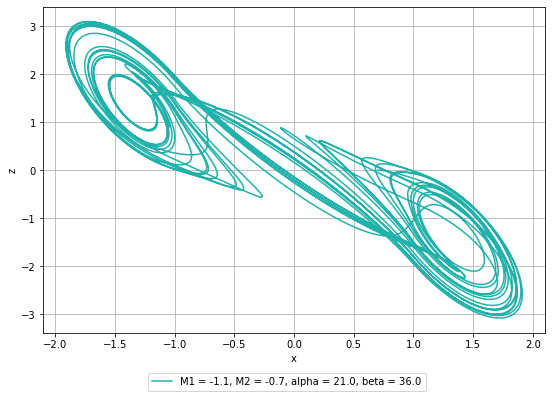

<Figure size 648x432 with 0 Axes>

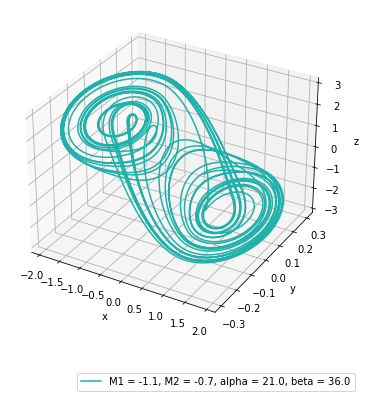

<Figure size 648x432 with 0 Axes>

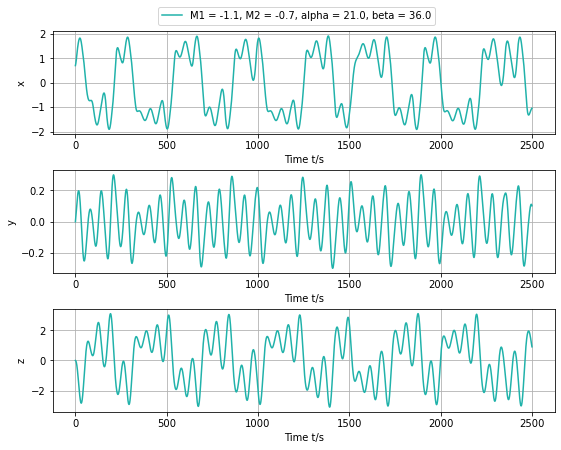

In [45]:
for axis in ['x-y', 'y-z', 'x-z', '3d', 'wave']:
    Chua(M1=-1.1, M2=-0.7, alpha=21, beta=36, axis=axis, path="Output/Double attractors/")

## 1st single attractor

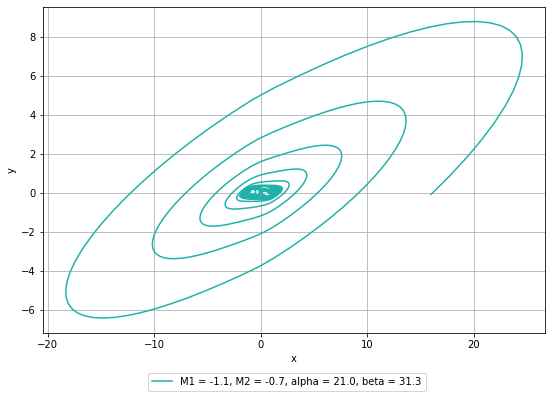

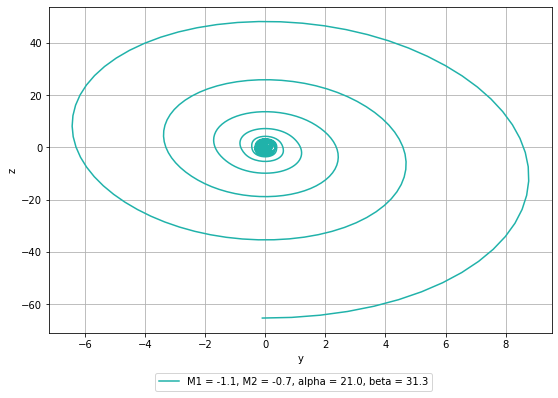

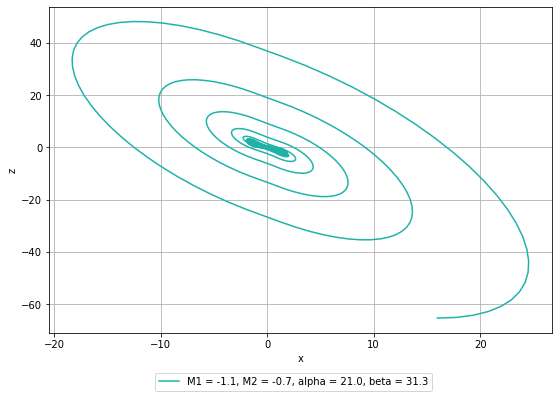

<Figure size 648x432 with 0 Axes>

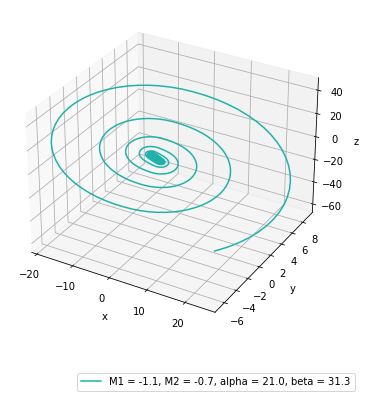

<Figure size 648x432 with 0 Axes>

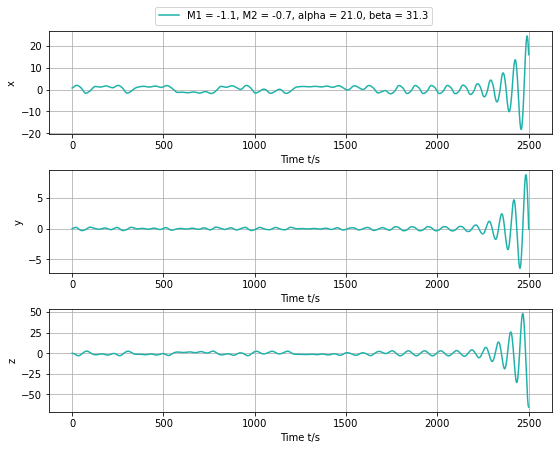

In [46]:
for axis in ['x-y', 'y-z', 'x-z', '3d', 'wave']:
    Chua(M1=-1.1, M2=-0.7, alpha=21, beta=31.3, axis=axis, path="Output/1st/")

## 2nd single attractor

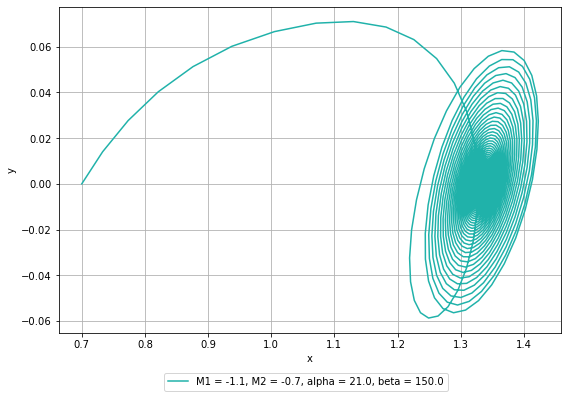

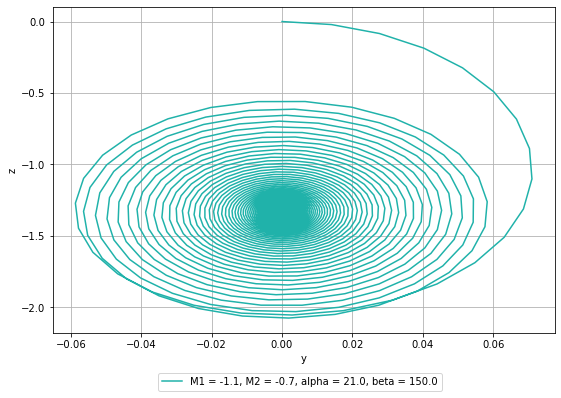

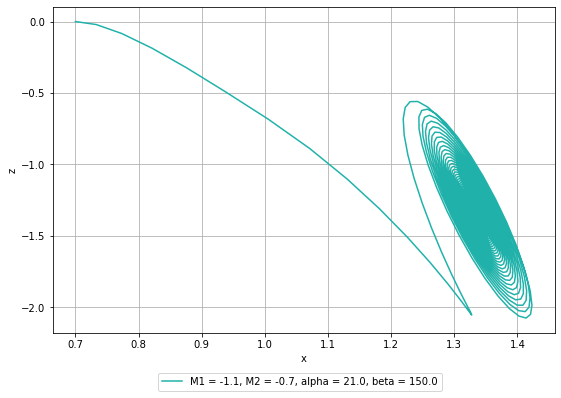

<Figure size 648x432 with 0 Axes>

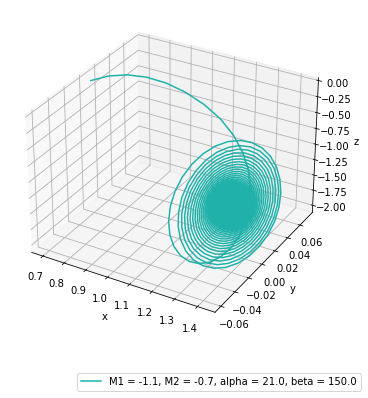

<Figure size 648x432 with 0 Axes>

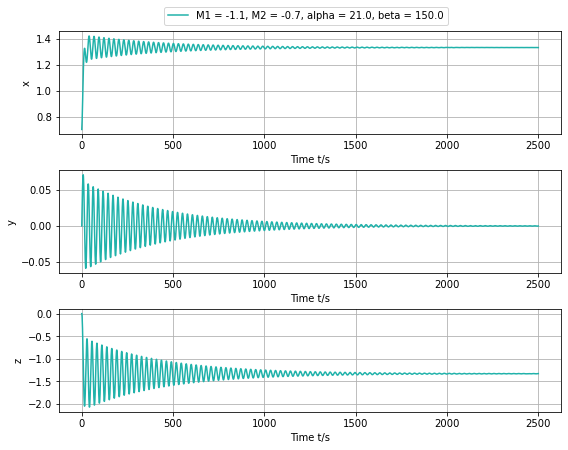

In [47]:
for axis in ['x-y', 'y-z', 'x-z', '3d', 'wave']:
    Chua(M1=-1.1, M2=-0.7, alpha=21, beta=150, axis=axis, path="Output/2nd/")